In [1]:
import pandas as pd

wine_df = pd.read_csv("data/wine/wine.data", header=None)
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = wine_df.iloc[:, 1:].values, wine_df.iloc[:, 0].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

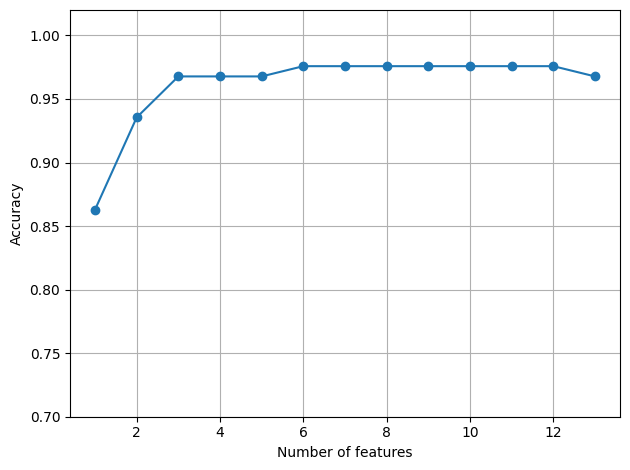

In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

features_selected = []
n_features_to_select = []
scores = []

for n_features in range(1, 13):
    n_features_to_select.append(n_features)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    sbs = SequentialFeatureSelector(knn, n_features_to_select=n_features, direction='backward')
    X_train_std_selected = sbs.fit_transform(X_train_std, y_train)
    
    knn.fit(X_train_std_selected, y_train)
    
    scores.append(knn.score(X_train_std_selected, y_train))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
scores.append(knn.score(X_train_std, y_train))
n_features_to_select.append(13)

plt.plot(n_features_to_select, scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')
sbs.fit(X_train_std, y_train)

wine_df.columns[1:][sbs.get_support()]

Index(['Alcohol', 'Flavanoids', 'Proline'], dtype='object')

In [24]:
X_train_std_selected = sbs.transform(X_train_std)
X_test_std_selected = sbs.transform(X_test_std)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std_selected, y_train)
print("仅选择3个特征时")
print(f"kNN 在训练集上的得分 {knn.score(X_train_std_selected, y_train):.2}")
print(f"kNN 在测试集上的得分 {knn.score(X_test_std_selected, y_test):.2}")


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
print("选择全部特征时")
print(f"kNN 在训练集上的得分 {knn.score(X_train_std, y_train):.2}")
print(f"kNN 在测试集上的得分 {knn.score(X_test_std, y_test):.2}")

仅选择3个特征时
kNN 在训练集上的得分 0.97
kNN 在测试集上的得分 0.89
选择全部特征时
kNN 在训练集上的得分 0.97
kNN 在测试集上的得分 0.96


In [17]:
wine_df.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')